<a href="https://colab.research.google.com/github/sandhiptha/sandhiptha/blob/master/project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**TITLE:MARKETING CAMPAIGN FOR BANKING PRODUCTS**

To build a model to identify the customers who can purchase loan at higher rate.

**1.IMPORTING THE LIBRARIES**

All the functions will be imported in order to read and run the code

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline


In [ ]:
from google.colab import files
upload = files.upload()

Saving datasets_48024_87370_Bank_Personal_Loan_Modelling (1).csv to datasets_48024_87370_Bank_Personal_Loan_Modelling (1).csv


In [ ]:
import io
dataset = pd.read_csv(io.BytesIO(upload['datasets_48024_87370_Bank_Personal_Loan_Modelling (1).csv']))

In [ ]:
#prints the first 5 data values

dataset.head(5)

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,1,25,1,49,91107,4,1.6,1,0,0,1,0,0,0
1,2,45,19,34,90089,3,1.5,1,0,0,1,0,0,0
2,3,39,15,11,94720,1,1.0,1,0,0,0,0,0,0
3,4,35,9,100,94112,1,2.7,2,0,0,0,0,0,0
4,5,35,8,45,91330,4,1.0,2,0,0,0,0,0,1


In [ ]:
#prints the last 5 data values
dataset.tail(5)

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
4995,4996,29,3,40,92697,1,1.9,3,0,0,0,0,1,0
4996,4997,30,4,15,92037,4,0.4,1,85,0,0,0,1,0
4997,4998,63,39,24,93023,2,0.3,3,0,0,0,0,0,0
4998,4999,65,40,49,90034,3,0.5,2,0,0,0,0,1,0
4999,5000,28,4,83,92612,3,0.8,1,0,0,0,0,1,1


In [ ]:
#prints the function values
dataset.describe()

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.00000,5000.000000,5000.000000
mean,2500.500000,45.338400,20.104600,73.774200,93152.503000,2.396400,1.937938,1.881000,56.498800,0.096000,0.104400,0.06040,0.596800,0.294000
std,1443.520003,11.463166,11.467954,46.033729,2121.852197,1.147663,1.747659,0.839869,101.713802,0.294621,0.305809,0.23825,0.490589,0.455637
min,1.000000,23.000000,-3.000000,8.000000,9307.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
25%,1250.750000,35.000000,10.000000,39.000000,91911.000000,1.000000,0.700000,1.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
50%,2500.500000,45.000000,20.000000,64.000000,93437.000000,2.000000,1.500000,2.000000,0.000000,0.000000,0.000000,0.00000,1.000000,0.000000
75%,3750.250000,55.000000,30.000000,98.000000,94608.000000,3.000000,2.500000,3.000000,101.000000,0.000000,0.000000,0.00000,1.000000,1.000000
max,5000.000000,67.000000,43.000000,224.000000,96651.000000,4.000000,10.000000,3.000000,635.000000,1.000000,1.000000,1.00000,1.000000,1.000000


checking the types of data and summary stats


In [ ]:
#prints the summary of data
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   ID                  5000 non-null   int64  
 1   Age                 5000 non-null   int64  
 2   Experience          5000 non-null   int64  
 3   Income              5000 non-null   int64  
 4   ZIP Code            5000 non-null   int64  
 5   Family              5000 non-null   int64  
 6   CCAvg               5000 non-null   float64
 7   Education           5000 non-null   int64  
 8   Mortgage            5000 non-null   int64  
 9   Personal Loan       5000 non-null   int64  
 10  Securities Account  5000 non-null   int64  
 11  CD Account          5000 non-null   int64  
 12  Online              5000 non-null   int64  
 13  CreditCard          5000 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 547.0 KB


In [ ]:
dataset.isnull().sum()

ID                    0
Age                   0
Experience            0
Income                0
ZIP Code              0
Family                0
CCAvg                 0
Education             0
Mortgage              0
Personal Loan         0
Securities Account    0
CD Account            0
Online                0
CreditCard            0
dtype: int64

In [ ]:
dataset.Online.sum()

2984

In [ ]:
dataset.Experience

0        1
1       19
2       15
3        9
4        8
        ..
4995     3
4996     4
4997    39
4998    40
4999     4
Name: Experience, Length: 5000, dtype: int64

**2.DROPPING THE COLUMNS**

In [ ]:
experience = dataset['Experience']
age = dataset['Age']
correlation = experience.corr(age)
correlation

0.9942148569683321

In [ ]:
dataset = dataset.drop(['ID','Experience'],axis=1)
dataset.head()

,Age,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,25,49,91107,4,1.6,1,0,0,1,0,0,0
1,45,34,90089,3,1.5,1,0,0,1,0,0,0
2,39,11,94720,1,1.0,1,0,0,0,0,0,0
3,35,100,94112,1,2.7,2,0,0,0,0,0,0
4,35,45,91330,4,1.0,2,0,0,0,0,0,1


In [ ]:
duplicate_rows_dataset = dataset[dataset.duplicated()]
print("Number of duplicate rows",duplicate_rows_dataset)

Number of duplicate rows Empty DataFrame
Columns: [Age, Income, ZIP Code, Family, CCAvg, Education, Mortgage, Personal Loan, Securities Account, CD Account, Online, CreditCard]
Index: []


In [ ]:
dataset = dataset.dropna()
dataset.count()

Age                   5000
Income                5000
ZIP Code              5000
Family                5000
CCAvg                 5000
Education             5000
Mortgage              5000
Personal Loan         5000
Securities Account    5000
CD Account            5000
Online                5000
CreditCard            5000
dtype: int64

In [ ]:
print(dataset.isnull().sum())

Age                   0
Income                0
ZIP Code              0
Family                0
CCAvg                 0
Education             0
Mortgage              0
Personal Loan         0
Securities Account    0
CD Account            0
Online                0
CreditCard            0
dtype: int64


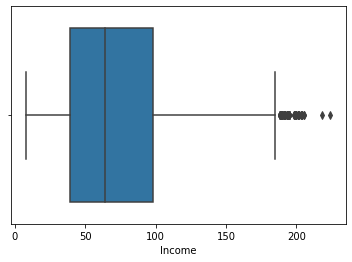

In [ ]:
sns.boxplot(x=dataset['Income'])

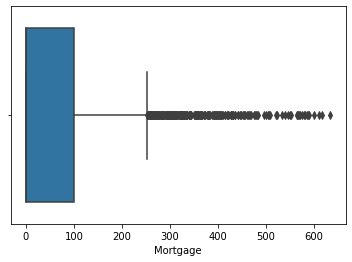

In [ ]:
sns.boxplot(x=dataset['Mortgage'])

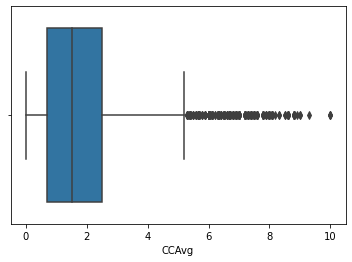

In [ ]:
sns.boxplot(x=dataset['CCAvg'])

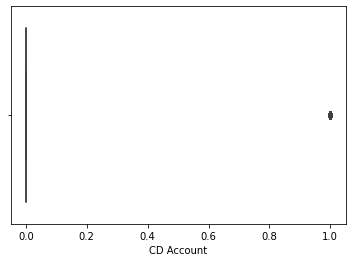

In [ ]:
sns.boxplot(x=dataset['CD Account'])

**3.EDA**

Exploratory data analysis is to provide only necessary and efficient information in order to run the further code

3.1.Number of unique in each column


In [ ]:
dataset.nunique()

Age                    45
Income                162
ZIP Code              467
Family                  4
CCAvg                 108
Education               3
Mortgage              347
Personal Loan           2
Securities Account      2
CD Account              2
Online                  2
CreditCard              2
dtype: int64

In [ ]:
dataset.drop('ZIP Code',axis=1)

,Age,Income,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,25,49,4,1.6,1,0,0,1,0,0,0
1,45,34,3,1.5,1,0,0,1,0,0,0
2,39,11,1,1.0,1,0,0,0,0,0,0
3,35,100,1,2.7,2,0,0,0,0,0,0
4,35,45,4,1.0,2,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...
4995,29,40,1,1.9,3,0,0,0,0,1,0
4996,30,15,4,0.4,1,85,0,0,0,1,0
4997,63,24,2,0.3,3,0,0,0,0,0,0
4998,65,49,3,0.5,2,0,0,0,0,1,0


3.2.Number of people with zero mortgage

In [ ]:
(dataset.Mortgage==0).sum()

3462

3.3.Number of people with zero credit card

In [ ]:
(dataset.CCAvg==0).sum()

106

3.4.counts of all categorical columns


In [ ]:
dataset.Family.value_counts()

1    1472
2    1296
4    1222
3    1010
Name: Family, dtype: int64

In [ ]:
dataset.Education.value_counts()

1    2096
3    1501
2    1403
Name: Education, dtype: int64

In [ ]:
dataset['Securities Account'].value_counts()

0    4478
1     522
Name: Securities Account, dtype: int64

In [ ]:
dataset['CD Account'].value_counts()

0    4698
1     302
Name: CD Account, dtype: int64

In [ ]:
dataset['CreditCard'].value_counts()

0    3530
1    1470
Name: CreditCard, dtype: int64

In [ ]:
dataset.Online.value_counts()

1    2984
0    2016
Name: Online, dtype: int64

3.5.Univariate and Bivariate Analysis


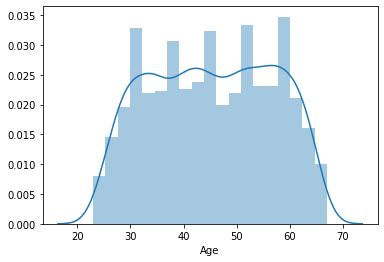

In [ ]:
sns.distplot(dataset.Age);

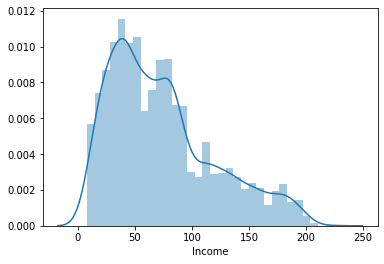

In [ ]:
sns.distplot(dataset.Income);

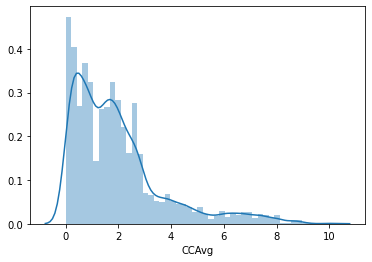

In [ ]:
sns.distplot(dataset.CCAvg);

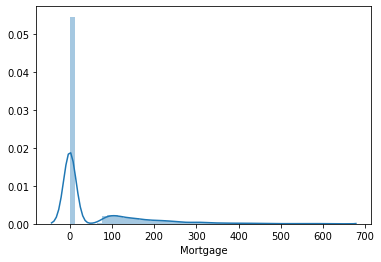

In [ ]:
sns.distplot(dataset.Mortgage);

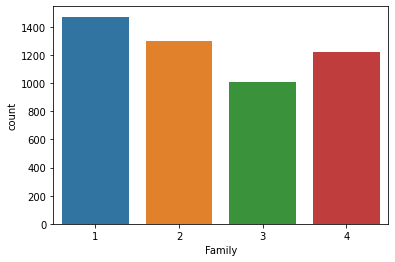

In [ ]:
sns.countplot(dataset.Family);

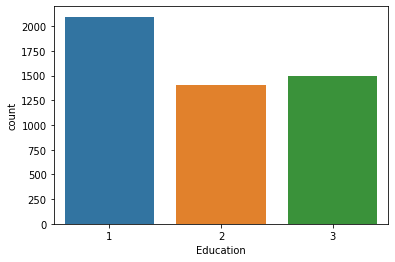

In [ ]:
sns.countplot(dataset.Education);

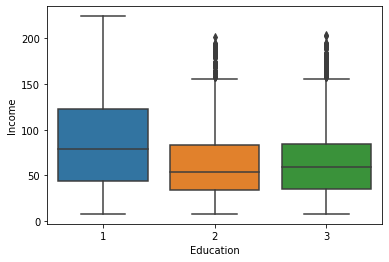

In [ ]:
sns.boxplot(x='Education',y='Income',hue_order='Personal Loan',data=dataset);

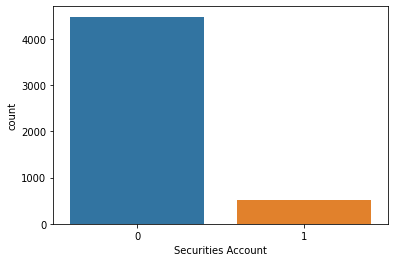

In [ ]:
sns.countplot(x='Securities Account',data=dataset,hue_order='Personal Loan');

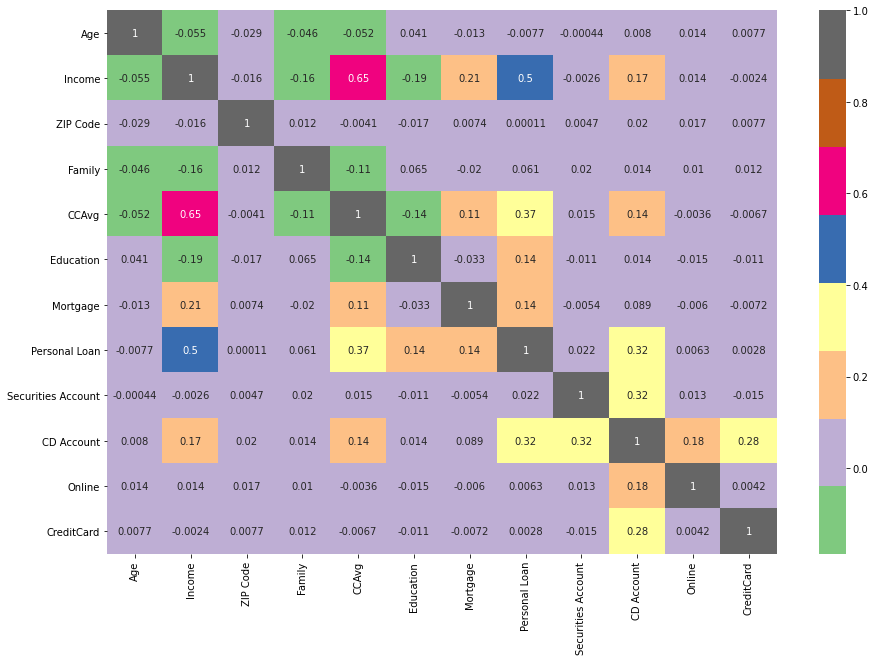

In [ ]:
fig,ax=plt.subplots(figsize=(15,10))
sns.heatmap(dataset.corr(),cmap='Accent',annot=True);

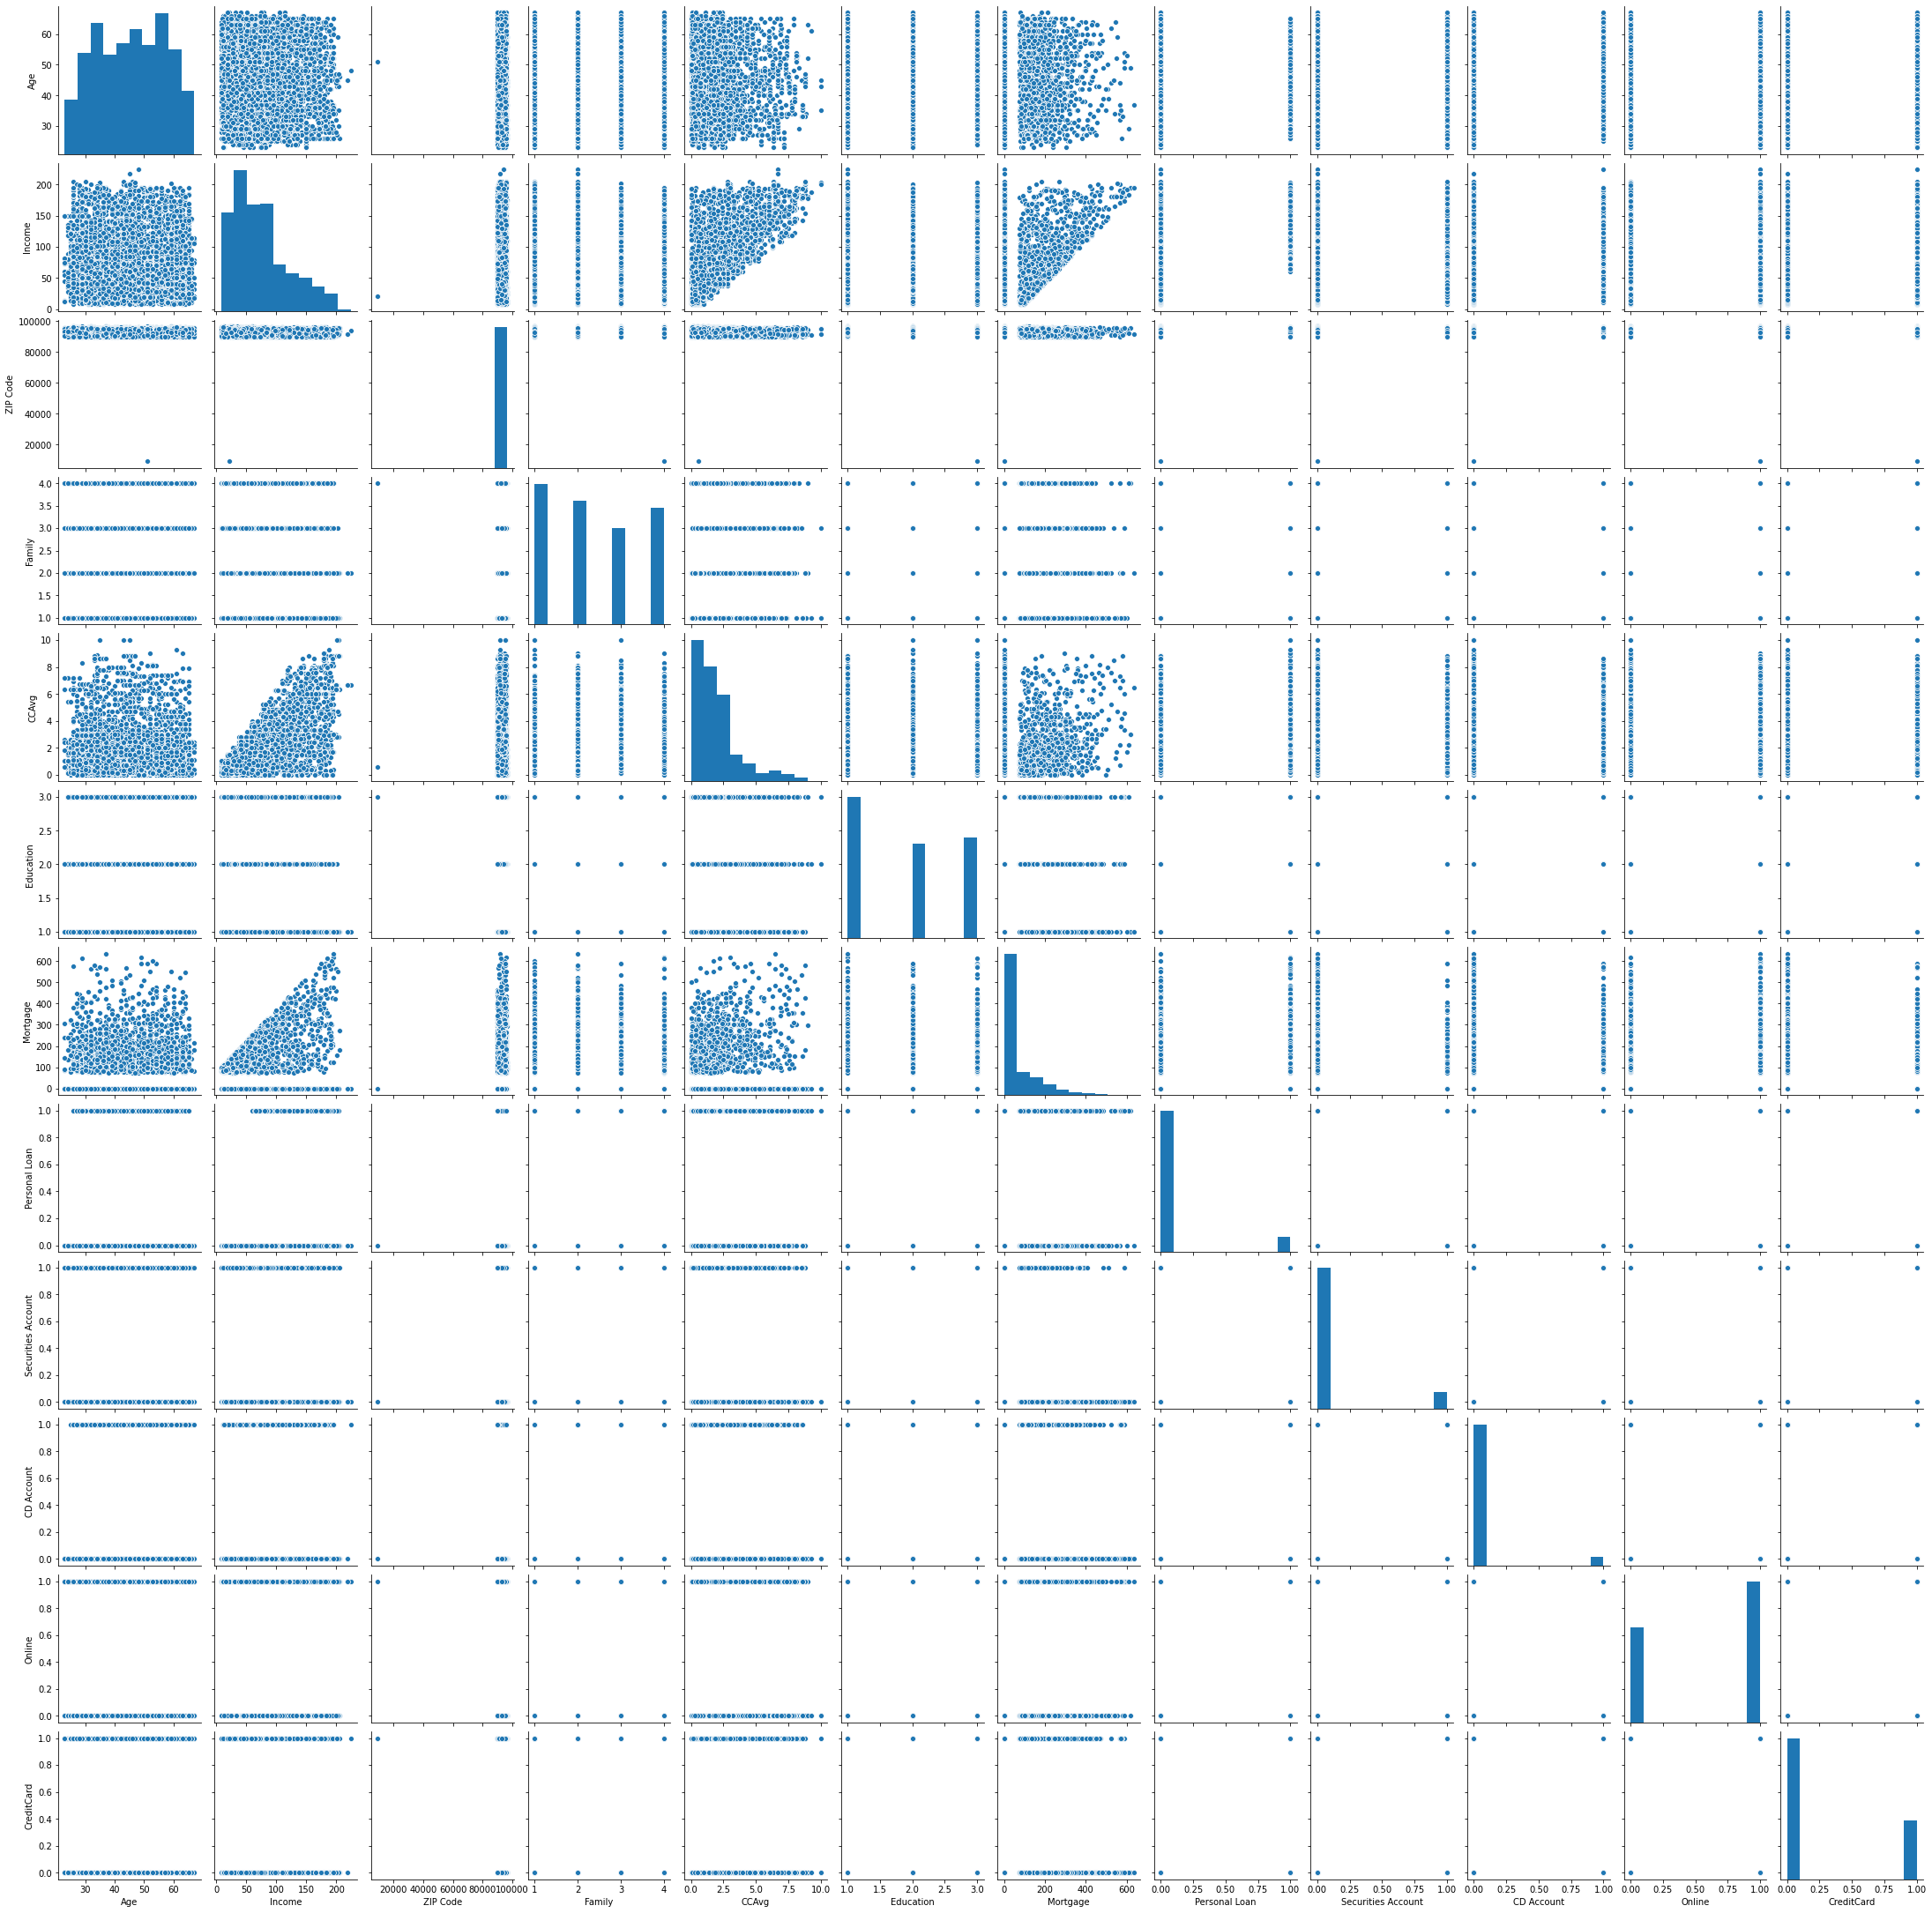

In [ ]:
sns.pairplot(dataset)

**4.TRANSFORMATIONS**

In [ ]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5000 entries, 0 to 4999
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Age                 5000 non-null   int64  
 1   Income              5000 non-null   int64  
 2   ZIP Code            5000 non-null   int64  
 3   Family              5000 non-null   int64  
 4   CCAvg               5000 non-null   float64
 5   Education           5000 non-null   int64  
 6   Mortgage            5000 non-null   int64  
 7   Personal Loan       5000 non-null   int64  
 8   Securities Account  5000 non-null   int64  
 9   CD Account          5000 non-null   int64  
 10  Online              5000 non-null   int64  
 11  CreditCard          5000 non-null   int64  
dtypes: float64(1), int64(11)
memory usage: 667.8 KB


In [ ]:
Q1=dataset.quantile(0.25)
Q2=dataset.quantile(0.75)
IQR=Q2-Q1
print(IQR)

Age                     20.0
Income                  59.0
ZIP Code              2697.0
Family                   2.0
CCAvg                    1.8
Education                2.0
Mortgage               101.0
Personal Loan            0.0
Securities Account       0.0
CD Account               0.0
Online                   1.0
CreditCard               1.0
dtype: float64


In [ ]:
dataset.corr()

,Age,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
Age,1.000000,-0.055269,-0.029216,-0.046418,-0.052012,0.041334,-0.012539,-0.007726,-0.000436,0.008043,0.013702,0.007681
Income,-0.055269,1.000000,-0.016410,-0.157501,0.645984,-0.187524,0.206806,0.502462,-0.002616,0.169738,0.014206,-0.002385
ZIP Code,-0.029216,-0.016410,1.000000,0.011778,-0.004061,-0.017377,0.007383,0.000107,0.004704,0.019972,0.016990,0.007691
Family,-0.046418,-0.157501,0.011778,1.000000,-0.109275,0.064929,-0.020445,0.061367,0.019994,0.014110,0.010354,0.011588
CCAvg,-0.052012,0.645984,-0.004061,-0.109275,1.000000,-0.136124,0.109905,0.366889,0.015086,0.136534,-0.003611,-0.006689
Education,0.041334,-0.187524,-0.017377,0.064929,-0.136124,1.000000,-0.033327,0.136722,-0.010812,0.013934,-0.015004,-0.011014
Mortgage,-0.012539,0.206806,0.007383,-0.020445,0.109905,-0.033327,1.000000,0.142095,-0.005411,0.089311,-0.005995,-0.007231
Personal Loan,-0.007726,0.502462,0.000107,0.061367,0.366889,0.136722,0.142095,1.000000,0.021954,0.316355,0.006278,0.002802
Securities Account,-0.000436,-0.002616,0.004704,0.019994,0.015086,-0.010812,-0.005411,0.021954,1.000000,0.317034,0.012627,-0.015028
CD Account,0.008043,0.169738,0.019972,0.014110,0.136534,0.013934,0.089311,0.316355,0.317034,1.000000,0.175880,0.278644


In [ ]:
x=dataset[['Age','Income','CCAvg','Education','Mortgage','Securities Account']]
y=dataset['Personal Loan'].values

In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
sc_x=StandardScaler()
sc_y=StandardScaler()
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=0,stratify=y)
sc_x.fit_transform(x_train)
sc_x.fit_transform(x_test)

array([[-1.02896547,  2.28327574,  4.03838349,  1.32053065, -0.56806057,
        -0.3527574 ],
       [ 0.80680777,  0.14313708,  1.02825289, -1.08626883, -0.56806057,
         2.83480944],
       [ 0.19488336,  1.15916251,  2.18599543, -1.08626883, -0.56806057,
         2.83480944],
       ...,
       [ 0.63197222, -0.93774102, -0.88202229,  1.32053065,  0.45508202,
        -0.3527574 ],
       [-1.02896547, -0.5486249 ,  0.33360737,  1.32053065, -0.56806057,
        -0.3527574 ],
       [-0.06736996, -0.35406684, -0.93990942,  1.32053065, -0.56806057,
         2.83480944]])

In [ ]:
print(x_train.shape,x_test.shape,y_train.shape,y_test.shape)

(3500, 6) (1500, 6) (3500,) (1500,)


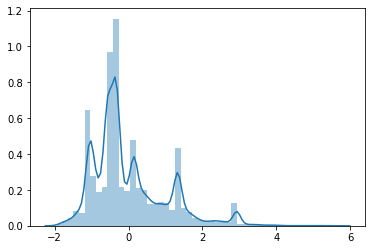

In [ ]:
from sklearn.preprocessing import StandardScaler
sc_x=StandardScaler()
x=sc_x.fit_transform(x)
sns.distplot(x)

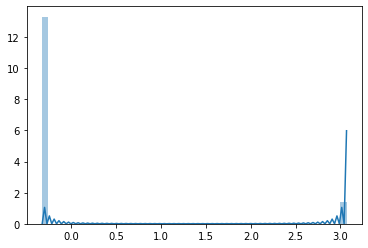

In [ ]:
sc_y=StandardScaler()
y=sc_y.fit_transform(y.reshape(-1,1))
sns.distplot(y)

**5.SPLITTING THE DATA**

In [ ]:
from sklearn.model_selection import train_test_split
x_train,x_test=train_test_split(x,test_size=0.3,random_state=0)
y_train,y_test=train_test_split(y,test_size=0.7,random_state=0)

In [ ]:
features=['Age','Income','CCAvg','Education']
x=dataset[features]
y=dataset['Personal Loan']

**6.LOGISTIC REGRESSION**

Logistic regression helps to predict the categorical variables.

In [ ]:
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=0)
print(x_train.shape,x_test.shape,y_train.shape,y_test.shape)

(3750, 4) (1250, 4) (3750,) (1250,)


In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn import preprocessing
model=LogisticRegression()

In [ ]:
model.fit(x_train,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [ ]:
y_predict=model.predict(x_test)
print(y_predict)

[0 0 0 ... 0 0 0]


The below metrics helps to evaluate the regression model

**7.ALL RELATED METRICS**

In [ ]:
from sklearn import metrics
print('Mean Absolute Error:',metrics.mean_absolute_error(y_test,y_predict))
print('Root Mean Squared Error:',np.sqrt(metrics.mean_squared_error(y_test,y_predict)))
print('R2 Score:',metrics.r2_score(y_test,y_predict))
print('Recall:',metrics.recall_score(y_test,y_predict)) 
print('Accuracy for test data:',metrics.accuracy_score(y_test,y_predict))
print('Accuracy for train data:',metrics.accuracy_score(y_train,model.predict(x_train)))

Mean Absolute Error: 0.0464
Root Mean Squared Error: 0.21540659228538014
R2 Score: 0.4121748718946616
Recall: 0.5925925925925926
Accuracy for test data: 0.9536
Accuracy for train data: 0.9394666666666667


In [ ]:
from sklearn.metrics import confusion_matrix
print(confusion_matrix(y_test,y_predict))

[[1128   14]
 [  44   64]]


In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y_test,y_predict))

              precision    recall  f1-score   support

           0       0.96      0.99      0.97      1142
           1       0.82      0.59      0.69       108

    accuracy                           0.95      1250
   macro avg       0.89      0.79      0.83      1250
weighted avg       0.95      0.95      0.95      1250



**8.VARIOUS CLASSIFICATION ALGORITHMS**

**DECISION TREE**

Decision tree is like a tool that uses tree model to interpret the data and consequences

In [ ]:
from sklearn.tree import DecisionTreeClassifier

In [ ]:
decisiontree=DecisionTreeClassifier()
model=decisiontree.fit(x_train,y_train)

In [ ]:
from sklearn import tree
import graphviz
dot_data=tree.export_graphviz(model,out_file=None,feature_names=['Age','Income','CCAvg','Education'],filled=True,rounded=True)

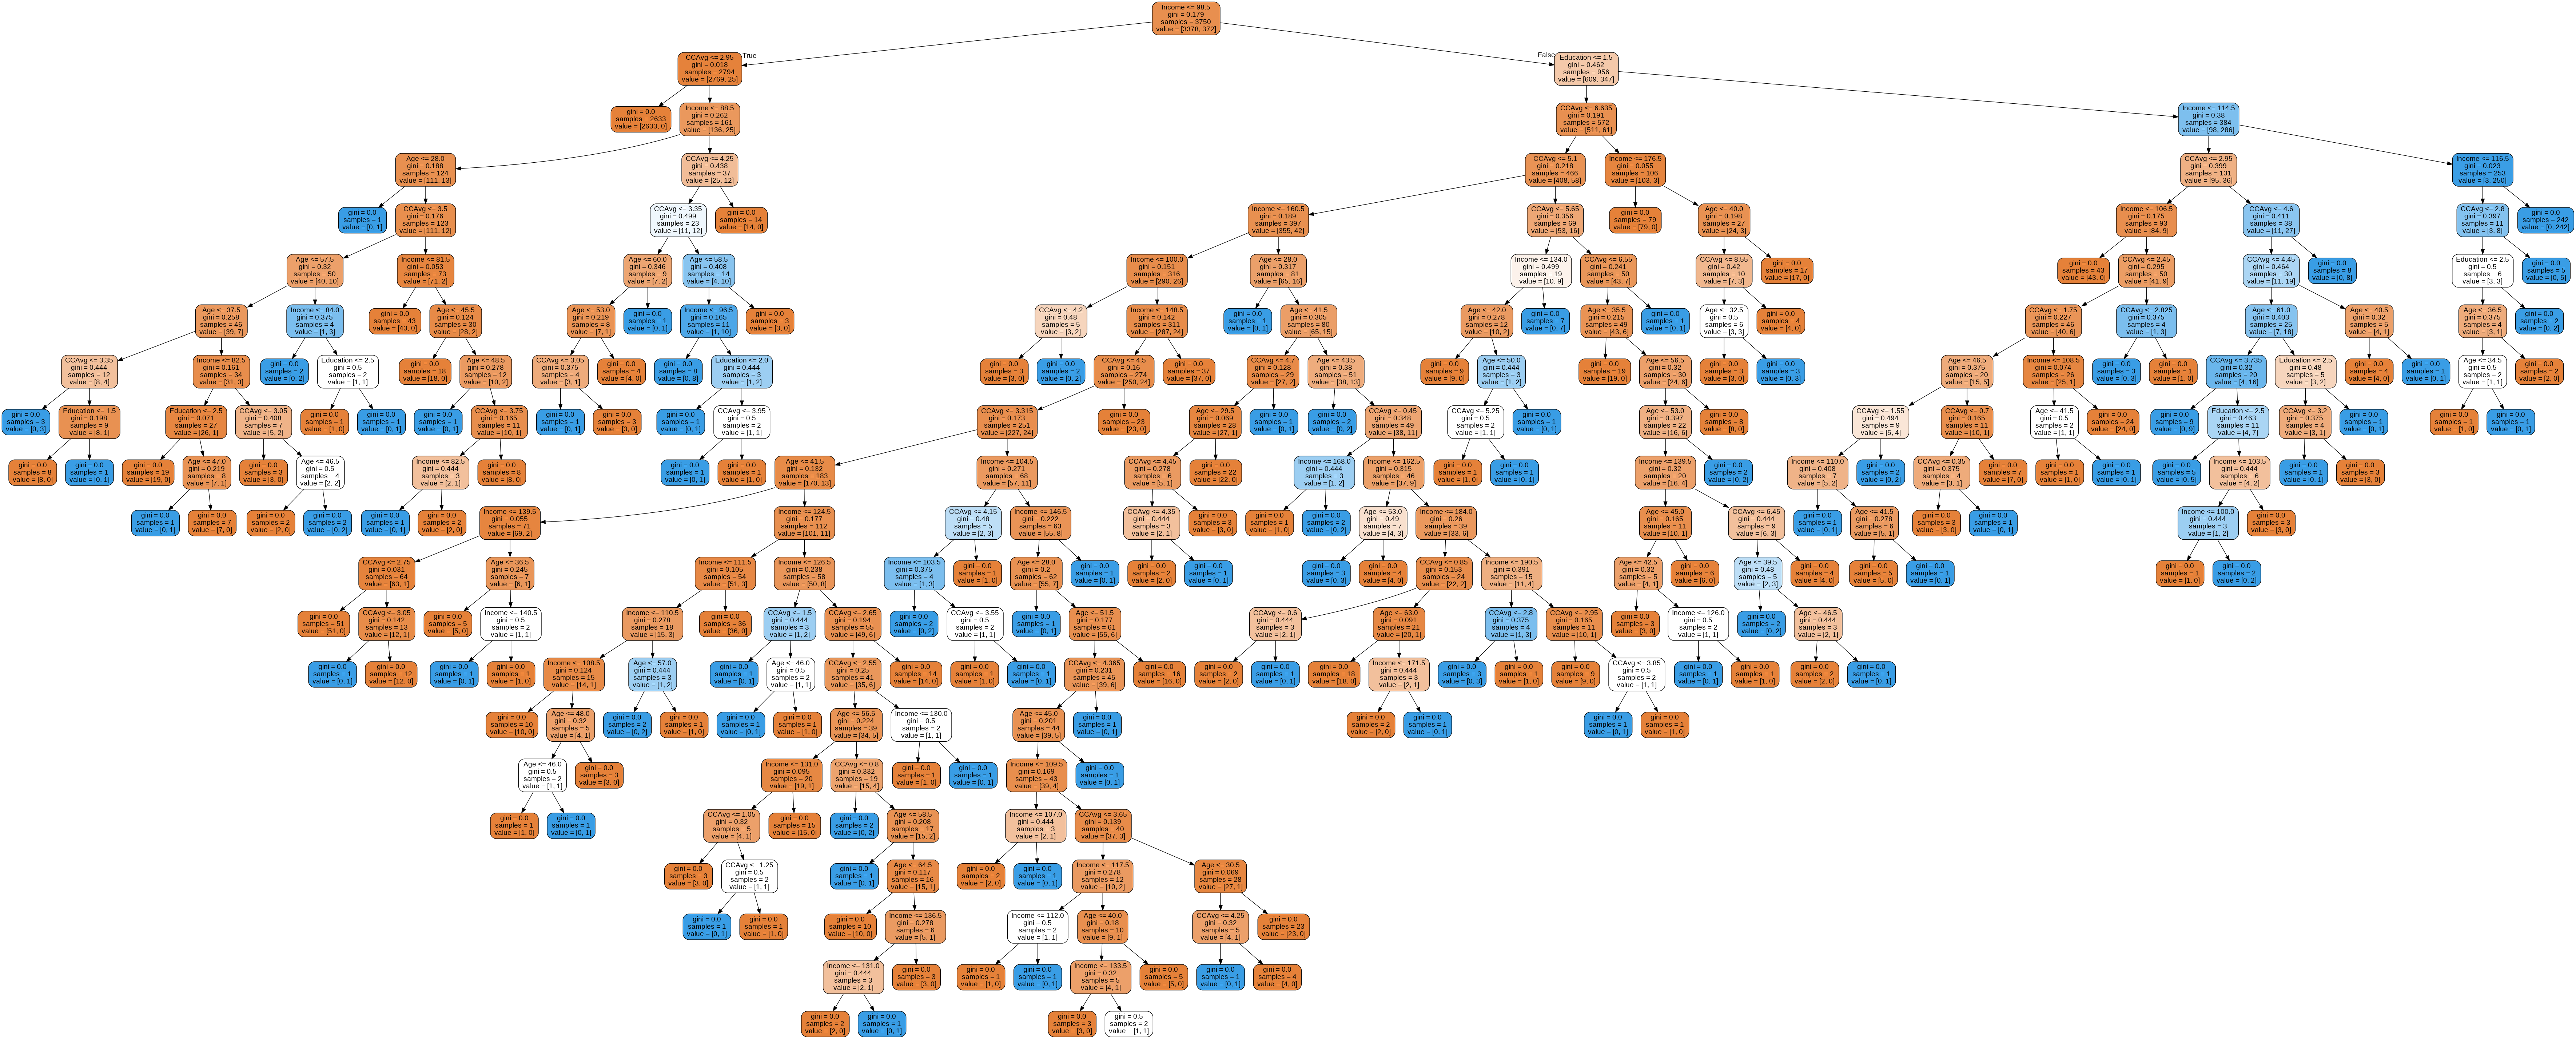

In [ ]:
#pydotplus helps in visualisng the data
import pydotplus
from IPython.display import Image
graph=pydotplus.graph_from_dot_data(dot_data)
Image(graph.create_png())

In [ ]:
model.fit(x_train,y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [ ]:
y_predict=model.predict(x_test)
print(y_predict)

[0 0 0 ... 0 0 0]


In [ ]:
from sklearn import metrics
print('Mean Absolute Error:',metrics.mean_absolute_error(y_test,y_predict))
print('Root Mean Squared Error:',np.sqrt(metrics.mean_squared_error(y_test,y_predict)))
print('R2 Score:',metrics.r2_score(y_test,y_predict))
print('Recall:',metrics.recall_score(y_test,y_predict)) 
print('Accuracy for test data:',metrics.accuracy_score(y_test,y_predict))
print('Accuracy for train data:',metrics.accuracy_score(y_train,model.predict(x_train)))

Mean Absolute Error: 0.0344
Root Mean Squared Error: 0.1854723699099141
R2 Score: 0.5641986119219042
Recall: 0.7777777777777778
Accuracy for test data: 0.9656
Accuracy for train data: 0.9997333333333334


confusion matrix helps to describes the performance of a classification model

In [ ]:
from sklearn.metrics import confusion_matrix
print(confusion_matrix(y_test,y_predict))

[[1123   19]
 [  24   84]]


In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y_test,y_predict))

              precision    recall  f1-score   support

           0       0.98      0.98      0.98      1142
           1       0.82      0.78      0.80       108

    accuracy                           0.97      1250
   macro avg       0.90      0.88      0.89      1250
weighted avg       0.96      0.97      0.97      1250



**K-NEAREST NEIGHBOR CLASSIFIER**

knn stores all the variables and classifies the new data based on similarity.

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
knn=KNeighborsClassifier()
model=knn.fit(x_train,y_train)

In [ ]:
y_predict=model.predict(x_test)
print(y_predict)

[0 0 0 ... 0 0 0]


In [ ]:
from sklearn import metrics
print('Mean Absolute Error:',metrics.mean_absolute_error(y_test,y_predict))
print('Root Mean Squared Error:',np.sqrt(metrics.mean_squared_error(y_test,y_predict)))
print('R2 Score:',metrics.r2_score(y_test,y_predict))
print('Recall:',metrics.recall_score(y_test,y_predict)) 
print('Accuracy for test data:',metrics.accuracy_score(y_test,y_predict))
print('Accuracy for train data:',metrics.accuracy_score(y_train,model.predict(x_train)))

Mean Absolute Error: 0.0712
Root Mean Squared Error: 0.26683328128252665
R2 Score: 0.09799247583836002
Recall: 0.3888888888888889
Accuracy for test data: 0.9288
Accuracy for train data: 0.9408


In [ ]:
from sklearn.metrics import confusion_matrix
print(confusion_matrix(y_test,y_predict))

[[1119   23]
 [  66   42]]


In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y_test,y_predict))

              precision    recall  f1-score   support

           0       0.94      0.98      0.96      1142
           1       0.65      0.39      0.49       108

    accuracy                           0.93      1250
   macro avg       0.80      0.68      0.72      1250
weighted avg       0.92      0.93      0.92      1250



**RANDOM FOREST**

Random forest is made of many decision trees ,this provides the mean prediction of all trees individually

In [ ]:
from sklearn.ensemble import RandomForestClassifier
model=RandomForestClassifier()
model.fit(x_train,y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [ ]:
y_predict=model.predict(x_test)
print(y_predict)

[0 0 0 ... 0 0 0]


In [ ]:
from sklearn import metrics
print('Mean Absolute Error:',metrics.mean_absolute_error(y_test,y_predict))
print('Root Mean Squared Error:',np.sqrt(metrics.mean_squared_error(y_test,y_predict)))
print('R2 Score:',metrics.r2_score(y_test,y_predict))
print('Recall:',metrics.recall_score(y_test,y_predict)) 
print('Accuracy for test data:',metrics.accuracy_score(y_test,y_predict))
print('Accuracy for train data:',metrics.accuracy_score(y_train,model.predict(x_train)))

Mean Absolute Error: 0.0248
Root Mean Squared Error: 0.15748015748023622
R2 Score: 0.6858176039436985
Recall: 0.75
Accuracy for test data: 0.9752
Accuracy for train data: 0.9997333333333334


In [ ]:
from sklearn.metrics import confusion_matrix
print(confusion_matrix(y_test,y_predict))

[[1138    4]
 [  27   81]]


In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y_test,y_predict))

              precision    recall  f1-score   support

           0       0.98      1.00      0.99      1142
           1       0.95      0.75      0.84       108

    accuracy                           0.98      1250
   macro avg       0.96      0.87      0.91      1250
weighted avg       0.97      0.98      0.97      1250



**NAIVE BAYES**

Naive bayes is a fast and easy model which can be used for large dataset

In [ ]:
from sklearn.naive_bayes import GaussianNB
model=GaussianNB()
model.fit(x_train,y_train)

GaussianNB(priors=None, var_smoothing=1e-09)

In [ ]:
y_predict=model.predict(x_test)
print(y_predict)

[0 0 0 ... 0 0 0]


In [ ]:
from sklearn import metrics
print('Mean Absolute Error:',metrics.mean_absolute_error(y_test,y_predict))
print('Root Mean Squared Error:',np.sqrt(metrics.mean_squared_error(y_test,y_predict)))
print('Recall:',metrics.recall_score(y_test,y_predict)) 
print('Accuracy for test data:',metrics.accuracy_score(y_test,y_predict))
print('Accuracy for train data:',metrics.accuracy_score(y_train,model.predict(x_train)))

Mean Absolute Error: 0.0808
Root Mean Squared Error: 0.2842534080710379
Recall: 0.5648148148148148
Accuracy for test data: 0.9192
Accuracy for train data: 0.9064


In [ ]:
from sklearn.metrics import confusion_matrix
print(confusion_matrix(y_test,y_predict))

[[1088   54]
 [  47   61]]


In [ ]:
from sklearn.metrics import classification_report

print(classification_report(y_test,y_predict))

              precision    recall  f1-score   support

           0       0.96      0.95      0.96      1142
           1       0.53      0.56      0.55       108

    accuracy                           0.92      1250
   macro avg       0.74      0.76      0.75      1250
weighted avg       0.92      0.92      0.92      1250



**9.CONCLUSION**


1.In order to use the inbuilt functions and libraries we import the various libraries

2.We loaded our data to read and conclude all the necessary information

3.We droped some columns which are not decision factors for the project

4.we plotted some graphs to make a better understanding

5.We obtained a optimised data after performing dropping ,splitting.


On applying various algorithms we predicted as follows:

1.Logistic Regression:

Accuracy score=95.3

confusion matrix:[1128 14][44 64]
 
                 precision    recall  f1-score   support

           0       0.96      0.99      0.97      1142
           1       0.82      0.59      0.69       108
     accuracy                          0.95      1250
     macro avg      0.89      0.79     0.83      1250
    weighted avg    0.95      0.95     0.95      1250


               
   

2.Naive Bayes:

Accuracy score=91.9

confusion matrix:[1088 54][47 61]

Classification report:

                 precision    recall  f1-score   support
          0         0.96      0.95       0.96      1142
           1        0.53      0.56       0.55      108
     accuracy                            0.92      1250
     macro avg       0.74      0.76      0.75      1250
    weighted avg     0.92      0.92      0.92      1250
         
3.KNN :

Accuracy score=92.8

confusion matrix:[1119 23][66 42]

Classification report:        
                   
                   precision    recall  f1-score   support
             0       0.94      0.98      0.96      1142
            1        0.65      0.39      0.49       108
     accuracy                            0.93      1250
     macro avg       0.80      0.68      0.72      1250
    weighted avg     0.92      0.93      0.92      1250

4.Decision Tree:

Accuracy score=96.5

confusion matrix:[1118 24][25 83]
                
Classification report:

                precision    recall   f1-score   support
           0       0.98      0.98      0.98      1142
           1       0.82      0.78      0.80       108
     accuracy                          0.97      1250
    macro avg      0.90      0.88      0.89      1250
    weighted avg   0.96       0.96     0.97      1250


5.Random Forest:

Accuracy score=97.5

confusion matrix:[1138 4][27 81]

Classification report:
     
                precision    recall  f1-score   support
          0       0.98      1.00      0.99      1142
          1       0.95      0.75      0.84      108
        accuracy                      0.98      1250
      macro avg   0.96      0.87      0.91      1250
    weighted avg  0.97      0.98      0.97      1250


From the above analysis we can conclude that:

KNN is performing better thanNaive Bayes.

Logistic regression performing better than KNN.

Decision Tree performing better than logistic,where Random Classifier performing better than Decision tree.

Above all Random Forest performing better than any other.